In [61]:
import os

import gzip

import pandas as pd

import numpy as np
np.random.seed(1000)

from matplotlib import pyplot as plt
import seaborn as sns
plt.tight_layout()
sns.set(style="whitegrid")
sns.set_palette((sns.color_palette('colorblind', 8)))
dims = (11.7, 8.27)
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import check_array

import time
import datetime
import math
import random

In [62]:
def load_mnist(path, kind='train'):
    ## Load MNIST function. Retrieved from https://github.com/zalandoresearch/fashion-mnist
    labels_path = os.path.join(path, '%s-labels-idx1-ubyte.gz' % kind)
    images_path = os.path.join(path, '%s-images-idx3-ubyte.gz' % kind)

    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8, offset=8)

    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8, offset=16).reshape(len(labels), 784)

    return images, labels

def preprocess(train, test):
    sc = StandardScaler()
    sc.fit(train)

    xform_train = sc.transform(train)
    xform_test = sc.transform(test)
    
    return xform_train, xform_test

def refresh_data():
    X_train, Y_train = load_mnist('C:/git/IST718/Lab3/data/fashion', kind='train')
    X_test, Y_test = load_mnist('C:/git/IST718/Lab3/data/fashion', kind='t10k')

    ## Transforming the data
    X_train, X_test = preprocess(X_train.astype('float64'), X_test.astype('float64'))

    ## Reducing the X values to decimals
    X_train /= 255
    X_test /= 255
    
    return X_train, X_test, Y_train, Y_test

def int_to_desc(i):
    ## Numeric dict for each value in the dataset
    conv = {0: 'T-shirt/top', 1: 'Trouser', 2: 'Pullover', 3: 'Dress', 4: 'Coat', 5: 'Sandal',
            6: 'Shirt', 7: 'Sneaker', 8: 'Bag', 9: 'Ankle boot'}
    ## Try to get the value for key i, else assign unknown
    try:
        ret = conv[i]
    except:
        ret = 'Unknown'
    return ret

def check_random(n, x, y, p):
    ## Takes in integer N, X data, Y data, and predicted Y data and returns a plot with the information displayed
    rows = math.ceil(n/5)
    fig, ax = plt.subplots(nrows=rows, ncols=5, sharex=True, sharey=True,)
    ax = ax.flatten()
    for i in range(n):
        j = random.randint(0,len(p)-1)
        img = x[j].reshape(28, 28)
        if p[j] != y[j]:
            cmap = 'Reds'
        else:
            cmap = 'Greens'
        ax[i].imshow(img, cmap=cmap, interpolation='nearest')
        predicted = int_to_desc(p[j])
        actual = int_to_desc(y[j])
        ax[i].set_title('P: {}\n A: {}'.format(predicted,actual))
    ax[0].set_xticks([])
    ax[0].set_yticks([])
    plt.tight_layout()
    plt.show()

In [4]:
nEst = range(1,100,1)
nJobs = 3

result_columns = ['n', 'time', 'acc']
result_df = pd.DataFrame(columns=result_columns)

In [5]:
for n in nEst:
    print('Refreshing data...')
    X_train, X_test, Y_train, Y_test = refresh_data()

    print ('N = {0}'.format(n))

    ## Starting timer
    starttime = time.time()

    ## Compiling and fitting model
    model = RandomForestClassifier(n_jobs=nJobs, n_estimators=n, verbose=1)
    model.fit(X_train, Y_train)

    ## Ending timer
    endtime = time.time()

    ## Total time
    totaltime = endtime - starttime

    ## Evaluating model on test data
    score = model.score(X_test, Y_test)

    rownum = len(result_df)
    result_df.at[rownum, 'n'] = n
    result_df.at[rownum, 'acc'] = score
    result_df.at[rownum, 'time'] = totaltime

Refreshing data...
N = 1


[Parallel(n_jobs=3)]: Done   1 out of   1 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Refreshing data...
N = 2


[Parallel(n_jobs=3)]: Done   2 out of   2 | elapsed:    0.8s finished
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    0.0s finished


Refreshing data...
N = 3


[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    1.0s finished
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    0.0s finished


Refreshing data...
N = 4


[Parallel(n_jobs=3)]: Done   4 out of   4 | elapsed:    1.9s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   4 out of   4 | elapsed:    1.9s finished
[Parallel(n_jobs=3)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   4 out of   4 | elapsed:    0.0s finished


Refreshing data...
N = 5


[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:    1.9s finished
[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:    0.0s finished


Refreshing data...
N = 6


[Parallel(n_jobs=3)]: Done   6 out of   6 | elapsed:    2.0s finished
[Parallel(n_jobs=3)]: Done   6 out of   6 | elapsed:    0.0s finished


Refreshing data...
N = 7


[Parallel(n_jobs=3)]: Done   7 out of   7 | elapsed:    2.8s finished
[Parallel(n_jobs=3)]: Done   7 out of   7 | elapsed:    0.0s finished


Refreshing data...
N = 8


[Parallel(n_jobs=3)]: Done   8 out of   8 | elapsed:    3.3s finished
[Parallel(n_jobs=3)]: Done   8 out of   8 | elapsed:    0.0s finished


Refreshing data...
N = 9


[Parallel(n_jobs=3)]: Done   9 out of   9 | elapsed:    3.3s finished
[Parallel(n_jobs=3)]: Done   9 out of   9 | elapsed:    0.0s finished


Refreshing data...
N = 10


[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    3.9s finished
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished


Refreshing data...
N = 11


[Parallel(n_jobs=3)]: Done  11 out of  11 | elapsed:    4.1s finished
[Parallel(n_jobs=3)]: Done  11 out of  11 | elapsed:    0.0s finished


Refreshing data...
N = 12


[Parallel(n_jobs=3)]: Done  12 out of  12 | elapsed:    4.1s finished
[Parallel(n_jobs=3)]: Done  12 out of  12 | elapsed:    0.0s finished


Refreshing data...
N = 13


[Parallel(n_jobs=3)]: Done  13 out of  13 | elapsed:    5.0s finished
[Parallel(n_jobs=3)]: Done  13 out of  13 | elapsed:    0.0s finished


Refreshing data...
N = 14


[Parallel(n_jobs=3)]: Done  14 out of  14 | elapsed:    5.6s finished
[Parallel(n_jobs=3)]: Done  14 out of  14 | elapsed:    0.0s finished


Refreshing data...
N = 15


[Parallel(n_jobs=3)]: Done  15 out of  15 | elapsed:    5.1s finished
[Parallel(n_jobs=3)]: Done  15 out of  15 | elapsed:    0.0s finished


Refreshing data...
N = 16


[Parallel(n_jobs=3)]: Done  16 out of  16 | elapsed:    5.9s finished
[Parallel(n_jobs=3)]: Done  16 out of  16 | elapsed:    0.0s finished


Refreshing data...
N = 17


[Parallel(n_jobs=3)]: Done  17 out of  17 | elapsed:    6.0s finished
[Parallel(n_jobs=3)]: Done  17 out of  17 | elapsed:    0.0s finished


Refreshing data...
N = 18


[Parallel(n_jobs=3)]: Done  18 out of  18 | elapsed:    5.9s finished
[Parallel(n_jobs=3)]: Done  18 out of  18 | elapsed:    0.0s finished


Refreshing data...
N = 19


[Parallel(n_jobs=3)]: Done  19 out of  19 | elapsed:    7.2s finished
[Parallel(n_jobs=3)]: Done  19 out of  19 | elapsed:    0.0s finished


Refreshing data...
N = 20


[Parallel(n_jobs=3)]: Done  20 out of  20 | elapsed:    6.9s finished
[Parallel(n_jobs=3)]: Done  20 out of  20 | elapsed:    0.0s finished


Refreshing data...
N = 21


[Parallel(n_jobs=3)]: Done  21 out of  21 | elapsed:    7.4s finished
[Parallel(n_jobs=3)]: Done  21 out of  21 | elapsed:    0.0s finished


Refreshing data...
N = 22


[Parallel(n_jobs=3)]: Done  22 out of  22 | elapsed:    8.0s finished
[Parallel(n_jobs=3)]: Done  22 out of  22 | elapsed:    0.0s finished


Refreshing data...
N = 23


[Parallel(n_jobs=3)]: Done  23 out of  23 | elapsed:    8.3s finished
[Parallel(n_jobs=3)]: Done  23 out of  23 | elapsed:    0.0s finished


Refreshing data...
N = 24


[Parallel(n_jobs=3)]: Done  24 out of  24 | elapsed:    8.1s finished
[Parallel(n_jobs=3)]: Done  24 out of  24 | elapsed:    0.0s finished


Refreshing data...
N = 25


[Parallel(n_jobs=3)]: Done  25 out of  25 | elapsed:    8.9s finished
[Parallel(n_jobs=3)]: Done  25 out of  25 | elapsed:    0.0s finished


Refreshing data...
N = 26


[Parallel(n_jobs=3)]: Done  26 out of  26 | elapsed:   14.6s finished
[Parallel(n_jobs=3)]: Done  26 out of  26 | elapsed:    0.0s finished


Refreshing data...
N = 27


[Parallel(n_jobs=3)]: Done  27 out of  27 | elapsed:   12.6s finished
[Parallel(n_jobs=3)]: Done  27 out of  27 | elapsed:    0.0s finished


Refreshing data...
N = 28


[Parallel(n_jobs=3)]: Done  28 out of  28 | elapsed:   13.0s finished
[Parallel(n_jobs=3)]: Done  28 out of  28 | elapsed:    0.0s finished


Refreshing data...
N = 29


[Parallel(n_jobs=3)]: Done  29 out of  29 | elapsed:   10.4s finished
[Parallel(n_jobs=3)]: Done  29 out of  29 | elapsed:    0.0s finished


Refreshing data...
N = 30


[Parallel(n_jobs=3)]: Done  30 out of  30 | elapsed:   10.1s finished
[Parallel(n_jobs=3)]: Done  30 out of  30 | elapsed:    0.0s finished


Refreshing data...
N = 31


[Parallel(n_jobs=3)]: Done  31 out of  31 | elapsed:   10.6s finished
[Parallel(n_jobs=3)]: Done  31 out of  31 | elapsed:    0.0s finished


Refreshing data...
N = 32


[Parallel(n_jobs=3)]: Done  32 out of  32 | elapsed:   11.3s finished
[Parallel(n_jobs=3)]: Done  32 out of  32 | elapsed:    0.0s finished


Refreshing data...
N = 33


[Parallel(n_jobs=3)]: Done  33 out of  33 | elapsed:   11.4s finished
[Parallel(n_jobs=3)]: Done  33 out of  33 | elapsed:    0.0s finished


Refreshing data...
N = 34


[Parallel(n_jobs=3)]: Done  34 out of  34 | elapsed:   12.3s finished
[Parallel(n_jobs=3)]: Done  34 out of  34 | elapsed:    0.0s finished


Refreshing data...
N = 35


[Parallel(n_jobs=3)]: Done  35 out of  35 | elapsed:   12.5s finished
[Parallel(n_jobs=3)]: Done  35 out of  35 | elapsed:    0.0s finished


Refreshing data...
N = 36


[Parallel(n_jobs=3)]: Done  36 out of  36 | elapsed:   12.7s finished
[Parallel(n_jobs=3)]: Done  36 out of  36 | elapsed:    0.0s finished


Refreshing data...
N = 37


[Parallel(n_jobs=3)]: Done  37 out of  37 | elapsed:   13.6s finished
[Parallel(n_jobs=3)]: Done  37 out of  37 | elapsed:    0.0s finished


Refreshing data...
N = 38


[Parallel(n_jobs=3)]: Done  38 out of  38 | elapsed:   13.0s finished
[Parallel(n_jobs=3)]: Done  38 out of  38 | elapsed:    0.0s finished


Refreshing data...
N = 39


[Parallel(n_jobs=3)]: Done  39 out of  39 | elapsed:   13.7s finished
[Parallel(n_jobs=3)]: Done  39 out of  39 | elapsed:    0.0s finished


Refreshing data...
N = 40


[Parallel(n_jobs=3)]: Done  40 out of  40 | elapsed:   14.1s finished
[Parallel(n_jobs=3)]: Done  40 out of  40 | elapsed:    0.0s finished


Refreshing data...
N = 41


[Parallel(n_jobs=3)]: Done  41 out of  41 | elapsed:   16.0s finished
[Parallel(n_jobs=3)]: Done  41 out of  41 | elapsed:    0.0s finished


Refreshing data...
N = 42


[Parallel(n_jobs=3)]: Done  42 out of  42 | elapsed:   15.1s finished
[Parallel(n_jobs=3)]: Done  42 out of  42 | elapsed:    0.0s finished


Refreshing data...
N = 43


[Parallel(n_jobs=3)]: Done  43 out of  43 | elapsed:   15.5s finished
[Parallel(n_jobs=3)]: Done  43 out of  43 | elapsed:    0.0s finished


Refreshing data...
N = 44


[Parallel(n_jobs=3)]: Done  44 out of  44 | elapsed:   16.2s finished
[Parallel(n_jobs=3)]: Done  44 out of  44 | elapsed:    0.0s finished


Refreshing data...
N = 45


[Parallel(n_jobs=3)]: Done  45 out of  45 | elapsed:   16.0s finished
[Parallel(n_jobs=3)]: Done  45 out of  45 | elapsed:    0.0s finished


Refreshing data...
N = 46


[Parallel(n_jobs=3)]: Done  46 out of  46 | elapsed:   16.1s finished
[Parallel(n_jobs=3)]: Done  46 out of  46 | elapsed:    0.0s finished


Refreshing data...
N = 47


[Parallel(n_jobs=3)]: Done  47 out of  47 | elapsed:   17.3s finished
[Parallel(n_jobs=3)]: Done  47 out of  47 | elapsed:    0.0s finished


Refreshing data...
N = 48


[Parallel(n_jobs=3)]: Done  48 out of  48 | elapsed:   17.1s finished
[Parallel(n_jobs=3)]: Done  48 out of  48 | elapsed:    0.0s finished


Refreshing data...
N = 49


[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:   15.9s
[Parallel(n_jobs=3)]: Done  49 out of  49 | elapsed:   17.7s finished
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done  49 out of  49 | elapsed:    0.0s finished


Refreshing data...
N = 50


[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:   15.2s
[Parallel(n_jobs=3)]: Done  50 out of  50 | elapsed:   17.1s finished
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done  50 out of  50 | elapsed:    0.0s finished


Refreshing data...
N = 51


[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:   15.6s
[Parallel(n_jobs=3)]: Done  51 out of  51 | elapsed:   17.8s finished
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done  51 out of  51 | elapsed:    0.0s finished


Refreshing data...
N = 52


[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:   15.6s
[Parallel(n_jobs=3)]: Done  52 out of  52 | elapsed:   18.4s finished
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done  52 out of  52 | elapsed:    0.0s finished


Refreshing data...
N = 53


[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:   15.8s
[Parallel(n_jobs=3)]: Done  53 out of  53 | elapsed:   18.9s finished
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done  53 out of  53 | elapsed:    0.0s finished


Refreshing data...
N = 54


[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:   16.3s
[Parallel(n_jobs=3)]: Done  54 out of  54 | elapsed:   20.0s finished
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done  54 out of  54 | elapsed:    0.0s finished


Refreshing data...
N = 55


[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:   15.5s
[Parallel(n_jobs=3)]: Done  55 out of  55 | elapsed:   19.9s finished
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done  55 out of  55 | elapsed:    0.0s finished


Refreshing data...
N = 56


[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:   15.5s
[Parallel(n_jobs=3)]: Done  56 out of  56 | elapsed:   19.4s finished
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done  56 out of  56 | elapsed:    0.0s finished


Refreshing data...
N = 57


[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:   15.6s
[Parallel(n_jobs=3)]: Done  57 out of  57 | elapsed:   19.9s finished
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done  57 out of  57 | elapsed:    0.0s finished


Refreshing data...
N = 58


[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:   15.2s
[Parallel(n_jobs=3)]: Done  58 out of  58 | elapsed:   20.2s finished
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done  58 out of  58 | elapsed:    0.0s finished


Refreshing data...
N = 59


[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:   15.6s
[Parallel(n_jobs=3)]: Done  59 out of  59 | elapsed:   20.7s finished
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done  59 out of  59 | elapsed:    0.0s finished


Refreshing data...
N = 60


[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:   15.5s
[Parallel(n_jobs=3)]: Done  60 out of  60 | elapsed:   20.5s finished
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done  60 out of  60 | elapsed:    0.0s finished


Refreshing data...
N = 61


[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:   15.5s
[Parallel(n_jobs=3)]: Done  61 out of  61 | elapsed:   21.7s finished
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done  61 out of  61 | elapsed:    0.0s finished


Refreshing data...
N = 62


[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:   15.6s
[Parallel(n_jobs=3)]: Done  62 out of  62 | elapsed:   21.7s finished
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done  62 out of  62 | elapsed:    0.0s finished


Refreshing data...
N = 63


[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:   15.5s
[Parallel(n_jobs=3)]: Done  63 out of  63 | elapsed:   21.6s finished
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done  63 out of  63 | elapsed:    0.0s finished


Refreshing data...
N = 64


[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:   14.8s
[Parallel(n_jobs=3)]: Done  64 out of  64 | elapsed:   21.6s finished
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done  64 out of  64 | elapsed:    0.0s finished


Refreshing data...
N = 65


[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:   14.7s
[Parallel(n_jobs=3)]: Done  65 out of  65 | elapsed:   21.9s finished
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done  65 out of  65 | elapsed:    0.0s finished


Refreshing data...
N = 66


[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:   15.1s
[Parallel(n_jobs=3)]: Done  66 out of  66 | elapsed:   22.2s finished
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done  66 out of  66 | elapsed:    0.0s finished


Refreshing data...
N = 67


[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:   15.0s
[Parallel(n_jobs=3)]: Done  67 out of  67 | elapsed:   22.8s finished
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done  67 out of  67 | elapsed:    0.0s finished


Refreshing data...
N = 68


[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:   15.1s
[Parallel(n_jobs=3)]: Done  68 out of  68 | elapsed:   23.0s finished
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done  68 out of  68 | elapsed:    0.0s finished


Refreshing data...
N = 69


[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:   15.0s
[Parallel(n_jobs=3)]: Done  69 out of  69 | elapsed:   23.2s finished
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done  69 out of  69 | elapsed:    0.0s finished


Refreshing data...
N = 70


[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:   15.3s
[Parallel(n_jobs=3)]: Done  70 out of  70 | elapsed:   24.3s finished
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done  70 out of  70 | elapsed:    0.0s finished


Refreshing data...
N = 71


[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:   15.0s
[Parallel(n_jobs=3)]: Done  71 out of  71 | elapsed:   24.0s finished
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done  71 out of  71 | elapsed:    0.0s finished


Refreshing data...
N = 72


[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:   15.0s
[Parallel(n_jobs=3)]: Done  72 out of  72 | elapsed:   24.0s finished
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done  72 out of  72 | elapsed:    0.0s finished


Refreshing data...
N = 73


[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:   15.3s
[Parallel(n_jobs=3)]: Done  73 out of  73 | elapsed:   25.1s finished
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done  73 out of  73 | elapsed:    0.0s finished


Refreshing data...
N = 74


[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:   14.7s
[Parallel(n_jobs=3)]: Done  74 out of  74 | elapsed:   24.7s finished
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done  74 out of  74 | elapsed:    0.0s finished


Refreshing data...
N = 75


[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:   15.2s
[Parallel(n_jobs=3)]: Done  75 out of  75 | elapsed:   25.2s finished
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done  75 out of  75 | elapsed:    0.0s finished


Refreshing data...
N = 76


[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:   14.6s
[Parallel(n_jobs=3)]: Done  76 out of  76 | elapsed:   25.1s finished
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done  76 out of  76 | elapsed:    0.0s finished


Refreshing data...
N = 77


[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:   15.4s
[Parallel(n_jobs=3)]: Done  77 out of  77 | elapsed:   26.5s finished
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done  77 out of  77 | elapsed:    0.0s finished


Refreshing data...
N = 78


[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:   15.0s
[Parallel(n_jobs=3)]: Done  78 out of  78 | elapsed:   26.3s finished
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done  78 out of  78 | elapsed:    0.1s finished


Refreshing data...
N = 79


[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:   15.0s
[Parallel(n_jobs=3)]: Done  79 out of  79 | elapsed:   26.9s finished
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done  79 out of  79 | elapsed:    0.0s finished


Refreshing data...
N = 80


[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:   15.7s
[Parallel(n_jobs=3)]: Done  80 out of  80 | elapsed:   28.2s finished
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done  80 out of  80 | elapsed:    0.1s finished


Refreshing data...
N = 81


[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:   15.2s
[Parallel(n_jobs=3)]: Done  81 out of  81 | elapsed:   27.3s finished
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done  81 out of  81 | elapsed:    0.1s finished


Refreshing data...
N = 82


[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:   15.2s
[Parallel(n_jobs=3)]: Done  82 out of  82 | elapsed:   28.2s finished
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done  82 out of  82 | elapsed:    0.0s finished


Refreshing data...
N = 83


[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:   14.8s
[Parallel(n_jobs=3)]: Done  83 out of  83 | elapsed:   27.7s finished
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done  83 out of  83 | elapsed:    0.1s finished


Refreshing data...
N = 84


[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:   15.4s
[Parallel(n_jobs=3)]: Done  84 out of  84 | elapsed:   28.8s finished
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done  84 out of  84 | elapsed:    0.1s finished


Refreshing data...
N = 85


[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:   14.8s
[Parallel(n_jobs=3)]: Done  85 out of  85 | elapsed:   28.6s finished
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done  85 out of  85 | elapsed:    0.1s finished


Refreshing data...
N = 86


[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:   15.2s
[Parallel(n_jobs=3)]: Done  86 out of  86 | elapsed:   29.3s finished
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done  86 out of  86 | elapsed:    0.1s finished


Refreshing data...
N = 87


[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:   15.0s
[Parallel(n_jobs=3)]: Done  87 out of  87 | elapsed:   29.4s finished
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done  87 out of  87 | elapsed:    0.1s finished


Refreshing data...
N = 88


[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:   15.1s
[Parallel(n_jobs=3)]: Done  88 out of  88 | elapsed:   30.4s finished
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done  88 out of  88 | elapsed:    0.1s finished


Refreshing data...
N = 89


[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:   15.3s
[Parallel(n_jobs=3)]: Done  89 out of  89 | elapsed:   29.2s finished
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done  89 out of  89 | elapsed:    0.1s finished


Refreshing data...
N = 90


[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:   13.4s
[Parallel(n_jobs=3)]: Done  90 out of  90 | elapsed:   27.0s finished
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done  90 out of  90 | elapsed:    0.1s finished


Refreshing data...
N = 91


[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:   13.4s
[Parallel(n_jobs=3)]: Done  91 out of  91 | elapsed:   27.6s finished
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done  91 out of  91 | elapsed:    0.0s finished


Refreshing data...
N = 92


[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:   13.4s
[Parallel(n_jobs=3)]: Done  92 out of  92 | elapsed:   27.6s finished
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done  92 out of  92 | elapsed:    0.1s finished


Refreshing data...
N = 93


[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:   13.4s
[Parallel(n_jobs=3)]: Done  93 out of  93 | elapsed:   27.9s finished
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done  93 out of  93 | elapsed:    0.1s finished


Refreshing data...
N = 94


[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:   13.5s
[Parallel(n_jobs=3)]: Done  94 out of  94 | elapsed:   28.9s finished
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done  94 out of  94 | elapsed:    0.1s finished


Refreshing data...
N = 95


[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:   13.4s
[Parallel(n_jobs=3)]: Done  95 out of  95 | elapsed:   28.5s finished
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done  95 out of  95 | elapsed:    0.1s finished


Refreshing data...
N = 96


[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:   13.4s
[Parallel(n_jobs=3)]: Done  96 out of  96 | elapsed:   29.5s finished
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done  96 out of  96 | elapsed:    0.1s finished


Refreshing data...
N = 97


[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:   13.2s
[Parallel(n_jobs=3)]: Done  97 out of  97 | elapsed:   29.0s finished
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done  97 out of  97 | elapsed:    0.1s finished


Refreshing data...
N = 98


[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:   13.2s
[Parallel(n_jobs=3)]: Done  98 out of  98 | elapsed:   29.4s finished
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done  98 out of  98 | elapsed:    0.1s finished


Refreshing data...
N = 99


[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:   13.3s
[Parallel(n_jobs=3)]: Done  99 out of  99 | elapsed:   29.7s finished
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done  99 out of  99 | elapsed:    0.1s finished


In [26]:
print('Refreshing data...')
X_train, X_test, Y_train, Y_test = refresh_data()

## Compiling and fitting model
model = RandomForestClassifier(n_jobs=3, n_estimators=500, verbose=1)
fit = model.fit(X_train, Y_train)
pred = model.predict(X_test)

Refreshing data...


[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:   11.3s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:   49.6s
[Parallel(n_jobs=3)]: Done 444 tasks      | elapsed:  1.9min
[Parallel(n_jobs=3)]: Done 500 out of 500 | elapsed:  2.1min finished
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:    0.2s
[Parallel(n_jobs=3)]: Done 444 tasks      | elapsed:    0.5s
[Parallel(n_jobs=3)]: Done 500 out of 500 | elapsed:    0.6s finished


In [27]:
score = model.score(X_test, Y_test)
print(score)

[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:    0.2s


0.8773


[Parallel(n_jobs=3)]: Done 444 tasks      | elapsed:    0.5s
[Parallel(n_jobs=3)]: Done 500 out of 500 | elapsed:    0.6s finished


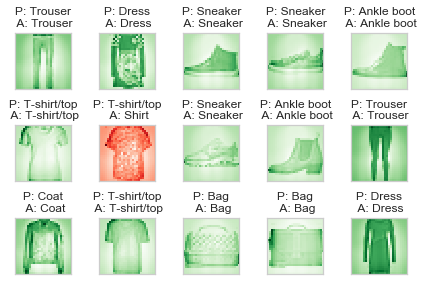

In [64]:
check_random(n=15, x=X_test, y=Y_test, p=pred)

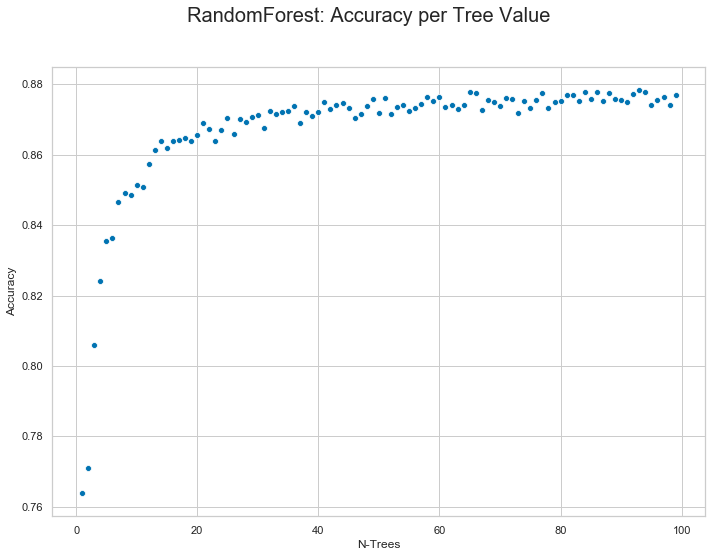

In [58]:
result_df['acc'] = result_df['acc'].astype(float)
result_df['n'] = result_df['n'].astype(int)

## Graphing the differences between K values, weight methods, and the algorithm used
fig1, ax1 = plt.subplots(figsize=dims)
plot1 = sns.scatterplot(x='n', y='acc', data=result_df, ax=ax1)
plot1 = fig1.suptitle('RandomForest: Accuracy per Tree Value', fontsize=20)
plot1 = ax1.set_ylabel('Accuracy')
plot1 = ax1.set_xlabel('N-Trees')
plot1.get_figure().savefig('RF_all_acc.png')